# Data Analysis and Review

In [ ]:
from google.colab import drive
import os
import matplotlib.pyplot as plt

drive.mount('/content/drive')

podcasts_folder_path = "/content/drive/MyDrive/Podcasts"
episode_path = "/content/drive/MyDrive/Podcasts/Awel Marra - أول مرة/cleaned_transcripts/؟(Date❤️) بودكاست أول مرة # 001 - إزاي نتصرف في أول مرة.txt"

## List of Spotify podcasts used in analysis


In [ ]:
folder_list = []
for item in os.listdir(podcasts_folder_path):
  item_path = os.path.join(podcasts_folder_path, item)
  if os.path.isdir(item_path):
    folder_list.append(item)
folder_list

['FoodCast',
 'نيللى وحكايات الدايت بودكاست Nilly Shams',
 'إيه المشكلة',
 'البشمهندس',
 'من غير مونتاج',
 'حواديت حقيقية',
 'karohat - كاروهات',
 'Awel Marra - أول مرة']

## Number of podcasts and total number of episodes used in analysis


In [ ]:
text_files = []
for folder in folder_list:
  folder_path = os.path.join(podcasts_folder_path, folder)
  raw_transcripts_path = os.path.join(folder_path, "raw_transcripts")
  for item in os.listdir(raw_transcripts_path):
    item_path = os.path.join(raw_transcripts_path, item)
    if os.path.isfile(item_path) and item.lower().endswith(".txt"):
      text_files.append(item_path)

print("Number of podcasts: " + str(len(folder_list)))
print("Number of documents: " + str(len(text_files)))

Number of podcasts: 8
Number of documents: 154


## Number of words per episode and average word count

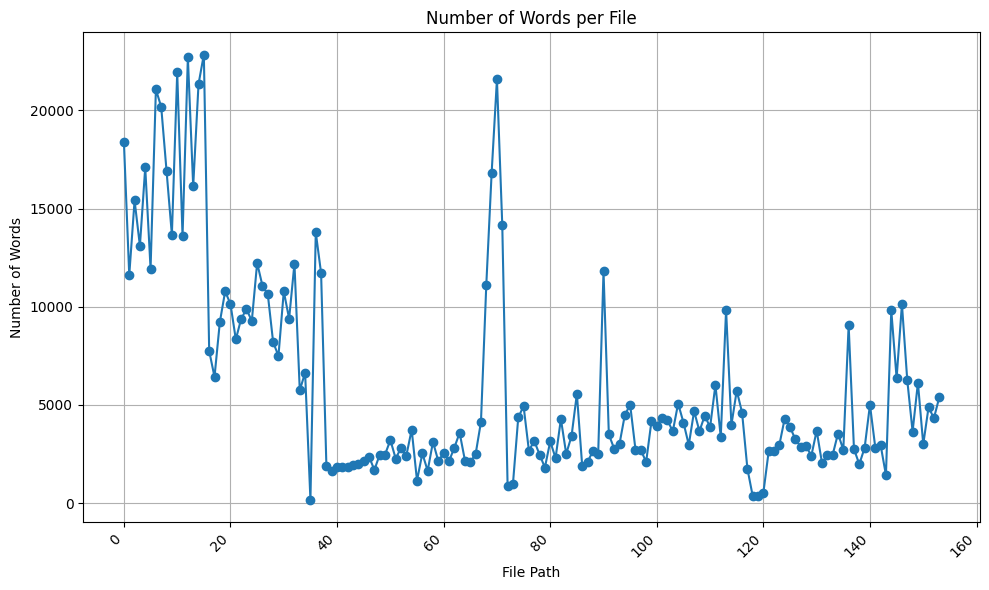

Average number of words per document: 5992.876623376624


In [ ]:
num_words_list = []
for file_path in text_files:
  with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()
    words = text.split()
    num_words = len(words)
  # print(f"Number of words in {(file_path.split('/'))[-1]}: {num_words}")
  num_words_list.append(num_words)

file_names = [os.path.basename(file_path) for file_path in text_files]

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
plt.plot(range(len(file_names)), num_words_list, marker='o', linestyle='-')

plt.xlabel("File Path")
plt.ylabel("Number of Words")
plt.title("Number of Words per File")
plt.grid(True)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Show the plot
plt.show()

print("Average number of words per document: " + str(sum(num_words_list)/len(num_words_list)))

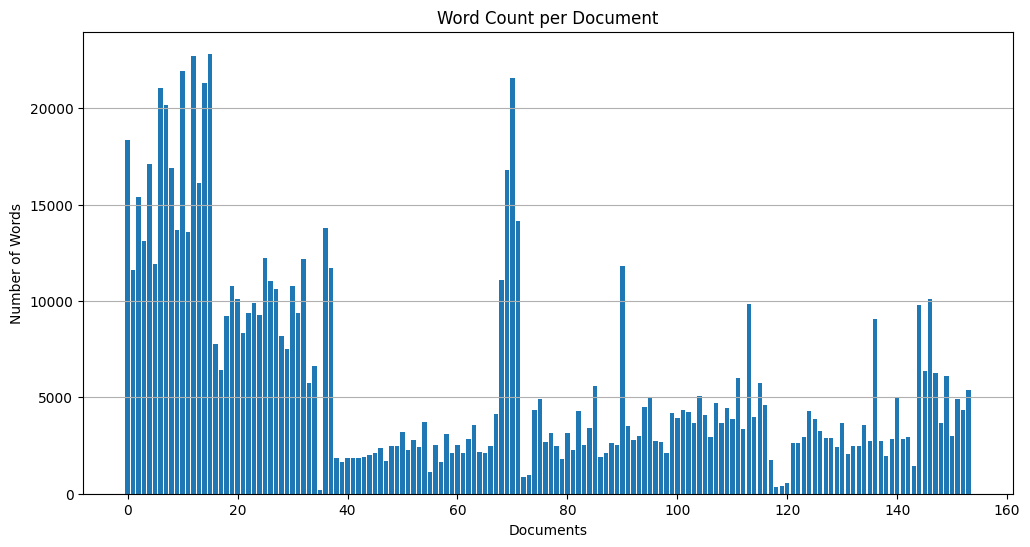

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(file_names)), num_words_list)

plt.xlabel("Documents")
plt.ylabel("Number of Words")
plt.title("Word Count per Document")
# plt.xticks(range(len(file_names)), rotation=90, fontsize=8)
plt.grid(axis='y')

plt.show()

## Vocabulary size and word frequency

In [ ]:
from collections import Counter

all_words = []
for file_path in text_files:
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        words = text.split()
        all_words.extend(words)

word_counts = Counter(all_words)
vocab_size = len(word_counts)

print(f"Vocabulary Size: {vocab_size}")
print("Word Frequencies (Top 10):")
for word, count in word_counts.most_common(10):
    print(f"{word}: {count}")

Vocabulary Size: 102343
Word Frequencies (Top 10):
في: 23385
أنا: 18625
إللي: 13067
يعني: 13022
من: 11127
مش: 11114
إن: 11046
ده: 10602
هو: 10411
ما: 9868


In [ ]:
!pip install arabic-reshaper python-bidi


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 6.9 MB/s eta 0:00:00


<ipython-input-33-476cc9d093dd>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=words, x=counts, palette="viridis")


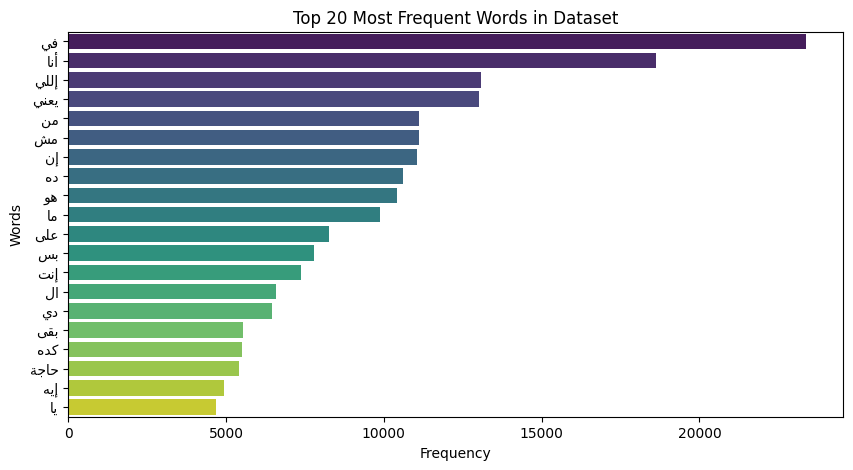

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

top_words = word_counts.most_common(20)
words, counts = zip(*top_words)

words = [get_display(arabic_reshaper.reshape(w)) for w in words]

plt.figure(figsize=(10, 5))
sns.barplot(y=words, x=counts, palette="viridis")

plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 20 Most Frequent Words in Dataset")
plt.show()


# Data Preprocessing & Cleaning

In [ ]:
new_dir = "/content/cleaned_transcripts"
if not os.path.exists(new_dir):
    os.makedirs(new_dir)

for file_path in text_files:
    with open(file_path, 'r', encoding='utf-8') as infile:
        text = infile.read().lower()

    new_file_path = os.path.join(new_dir, os.path.basename(file_path))
    with open(new_file_path, 'w', encoding='utf-8') as outfile:
        outfile.write(text)
print("Saved documents in a new folder /content/cleaned_transcripts...")

Saved documents in a new folder /content/cleaned_transcripts...


## Stop word removal

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# Load the text file
for episode_path in os.listdir(new_dir):
  episode_path = os.path.join(new_dir, episode_path)
  with open(episode_path, 'r', encoding='utf-8') as file:
    text = file.read()
    words = text.split()
    # Remove stopwords using the nltk library
    filtered_words = [word for word in words if not word in stopwords.words('arabic')]
    # Join the filtered words back into a single string
    filtered_text = ' '.join(filtered_words)
  # Save the filtered text back to the same file
  with open(episode_path, 'w', encoding='utf-8') as outfile:
    outfile.write(' '.join(filtered_words))

# Print the filtered text
print(filtered_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0:00 آآه، ازيكم كويسين رب دايما آه، أنا. 0:18 الأسبوع إللي فات كنت طلعت ضيفة. البوتكس تات المجاورة كوبايتين قهوة والحلقة كانت عاملة 9:50 تمام إحنا هنتكلم بالراحه خناق لإن إحنا نضج مش هجيب حد ياقة قميصه إحنا هنتكلم زي الكبار قابلت هجوم شرس أهلي وناسي جيراني حي الكاروهات المتميز إللي مسلم اهم العضوية بإيدي مدخلاهم الجروب قابلت هاهاها جموعة البوستات الساخرة زي إنتي حلوة. 0:59 بتعرفي تعملي حلقات 9:50 بتشوفو جماعة مي إللي طلعت حلقة 9:50 دي فطست عاملة دلوقتي. طيب هنتكلم بالراحة لأن العنف بيولد العنف دلوقتي الحلقة عدد أحمد الهريدي عدد خالد عدد مي إبراهيم مجموعة توتال أشخاص الحلقة تمام نقسم أشخاص بفايد ايه 9:50 إكول تسعطعشر بوينت 66666667 قول 20 دقيقة مش إللي بطلعلكو بيهم الحلقة مش يبقى نتأسف نتأسف يبقى ننزل بوستات اعتذارات رسمية تقدم نقابة البوتكس باسمي منقدمش خلاص مش زعلانة مش زعلانة حصل خير يلا نفتح صفحة جديدة نخش الحلقة حلوين يلا نبص راس بص جماعة عشان نحسم الجدل موضوع تطويل الحلقة ده. 2:10 والنزل الصاج وكل يروح لحال سبيله ويا دار دخلك حر حبايب قلبي حلقاتي قطعية الأنتر كوت إللي بتتعمل استيك

Word frequency after stop word removal:

In [ ]:
all_words = []
for file_path in os.listdir(new_dir):
    file_path = os.path.join(new_dir, file_path)
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        words = text.split()
        all_words.extend(words)

word_counts = Counter(all_words)
vocab_size = len(word_counts)

print(f"Vocabulary Size: {vocab_size}")
print("Word Frequencies (Top 10):")
for word, count in word_counts.most_common(10):
    print(f"{word}: {count}")

Vocabulary Size: 101947
Word Frequencies (Top 10):
إللي: 13067
يعني: 13022
مش: 11114
ده: 10602
إنت: 7392
ال: 6594
دي: 6450
بقى: 5525
كده: 5511
حاجة: 5408


<ipython-input-42-9208d222c94e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=words, x=counts, palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


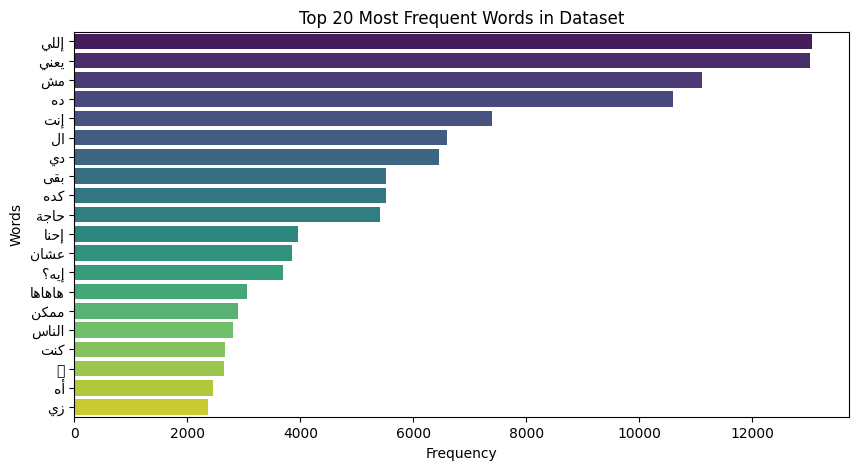

In [ ]:
top_words = word_counts.most_common(20)
words, counts = zip(*top_words)

words = [get_display(arabic_reshaper.reshape(w)) for w in words]

plt.figure(figsize=(10, 5))
sns.barplot(y=words, x=counts, palette="viridis")

plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 20 Most Frequent Words in Dataset")
plt.show()